# Covid_19 Prediction Capstone Project 



# Business objective

> What questions do I want to answer?
   - Our project aims to answer the following questions:
     - Can we accurately predict COVID-19 infection based on symptoms and other factors?
     - Which symptoms are most indicative of a COVID-19 positive case?
     - How does age and gender influence the likelihood of COVID-19 infection?
     - Can we identify any patterns or trends in COVID-19 cases over time?
     - How effective is our predictive model in differentiating COVID-19 positive and negative cases?


Project Proposal for COVID19 prediction

1. Why is your proposal important in today's world?How can predicting a disease accurately improve medical treatment?

- Our proposal of using machine learning for predicting COVID-19 is important in today's world because it addresses the need for accurate and timely identification of individuals at risk of contracting the disease. By leveraging data and advanced analytics, we can improve the effectiveness of screening and reduce the burden on healthcare systems. This can lead to early detection, prompt treatment, and appropriate allocation of resources, ultimately saving lives and minimizing the spread of the virus.

- Accurate disease prediction enables healthcare providers to proactively identify individuals who are at a higher risk of contracting COVID-19. This information can guide medical treatment decisions, such as prioritizing testing and monitoring, implementing preventive measures, and allocating resources efficiently. By identifying high-risk individuals early on, healthcare providers can intervene promptly, provide targeted care, and potentially prevent severe complications or even mortality. This improves the overall quality of medical treatment and patient outcomes.


2. How is it going to impact the medical field when it comes to effective screening and reducing healthcare burden?

- Implementing an accurate disease prediction model based on machine learning can have a significant impact on the medical field. It enables healthcare professionals to identify individuals who are more likely to develop COVID-19, allowing for effective screening strategies. By focusing resources on high-risk individuals, healthcare systems can optimize their screening efforts, ensure early detection, and reduce the burden on healthcare facilities. This leads to efficient resource allocation, better management of healthcare resources, and improved patient care overall.

3. If any, what is the gap in the knowledge or how can your proposed method be helpful in the future for any other disease?

- The proposed method of using machine learning for disease prediction addresses the knowledge gap in understanding the complex relationships and patterns in COVID-19 data. By developing accurate models for COVID-19 prediction, we gain insights into the risk factors, symptom profiles, and disease progression patterns. These insights can be valuable not only for future studies and research related to COVID-19 but also for similar disease outbreaks or pandemics in the future. The methods and techniques developed can be applied to other diseases, helping healthcare professionals and researchers predict and manage diseases more effectively.

The knowledge gained from this project can contribute to the development of robust prediction models and screening strategies for future outbreaks or epidemics.

# 0. import the necessary packages


# importing libraries


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly.express as px
import missingno as msno
from scipy import stats
from datetime import datetime, timedelta
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# 1. Get the data

## 1.1 import csv file

In [3]:
# Load the dataset
df=pd.read_csv("corona_tested_006.csv")

C:\Users\Chiranth\AppData\Local\Temp\ipykernel_5652\4047638301.py:2: DtypeWarning: Columns (2,3,4,5,6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("corona_tested_006.csv")


## 1.2 creating the target variable

In [3]:
# Select the target variable
target_variable = df['Corona']


# Verify the extracted target variable
print(target_variable)

#shape of full data
df.shape


0         negative
1         positive
2         positive
3         negative
4         negative
            ...   
278843    positive
278844    negative
278845    negative
278846    negative
278847    negative
Name: Corona, Length: 278848, dtype: object


(278848, 11)

## 1.3 Hypothesis

Based on the initial analysis of the data, our initial hypotheses are as follows:

- Hypothesis: There is a correlation between certain symptoms (such as cough, fever, sore throat) and the presence of COVID-19.

- Assumption: Patients with COVID-19 are more likely to experience these symptoms compared to those without COVID-19.
- Approach: We will analyze the frequency and distribution of these symptoms among COVID-19 positive and negative cases to identify any significant patterns.

- Hypothesis: Age and known contact play a role in the likelihood of contracting COVID-19.

- Assumption: Older individuals and those with known contact with COVID-19 patients are at a higher risk of testing positive.
- Approach: We will examine the distribution of age and known contact variables among COVID-19 positive and negative cases to determine any associations.

- Hypothesis: Gender may be a factor in the susceptibility to COVID-19.

- Assumption: There may be differences in the distribution of COVID-19 cases between males and females.
- Approach: We will analyze the gender distribution among COVID-19 positive and negative cases to investigate any gender-related patterns.

By exploring these hypotheses, we aim to identify important features and relationships within the data that can inform our machine learning models and provide insights into the factors influencing COVID-19 cases.

## 1.4 Data Analysis Approach



1. What approach are you going to take in order to prove or disprove your hypothesis?

- To prove or disprove the hypothesis, we will adopt a data analysis approach that involves exploratory data analysis (EDA) and statistical techniques. We will analyze the COVID19 dataset, examine the relationships between variables, and conduct hypothesis testing to validate our assumptions.

2. What feature engineering techniques will be relevant to your project?

- Feature engineering techniques that will be relevant to our project include encoding categorical variables, scaling numerical variables, handling missing data, and creating new features derived from existing ones. This process will help us improve the quality and relevance of the features used in our models.

3. Please justify your data analysis approach.

- Our data analysis approach is justified because EDA allows us to gain insights into the data, understand its characteristics, and identify any patterns or trends. By conducting statistical analyses and hypothesis testing, we can provide evidence to support or refute our initial hypotheses.

4. Identify important patterns in your data using the EDA approach to justify your findings.

- During the EDA phase, we will visualize the data using plots and charts, calculate summary statistics, identify correlations between variables, and perform statistical tests to assess the significance of relationships. This will help us uncover important patterns in the data and justify our findings based on empirical evidence.

# 2. Explore the Data

## 2.1 Quick glance at the data

In [4]:
df.head(15)

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed
5,6,11-03-2020,True,False,False,False,False,other,NaN,NaN,Contact with confirmed
6,7,11-03-2020,False,False,False,False,False,negative,NaN,NaN,Other
7,8,11-03-2020,False,True,False,False,False,negative,NaN,NaN,Abroad
8,9,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
9,10,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278596 non-null  object
 3   Fever                278596 non-null  object
 4   Sore_throat          278847 non-null  object
 5   Shortness_of_breath  278847 non-null  object
 6   Headache             278847 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         151528 non-null  object
 9   Sex                  259285 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [7]:
# Get statistical summary of the dataset
df.describe()

,Ind_ID
count,278848.000000
mean,139424.500000
std,80496.628269
min,1.000000
25%,69712.750000
50%,139424.500000
75%,209136.250000
max,278848.000000


In [8]:
# check the unique values count 
df.nunique()

Ind_ID                 278848
Test_date                  51
Cough_symptoms              2
Fever                       2
Sore_throat                 2
Shortness_of_breath         2
Headache                    2
Corona                      3
Age_60_above                2
Sex                         2
Known_contact               3
dtype: int64

In [9]:
# check the missing values/ null values count
df.isnull().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                      0
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64

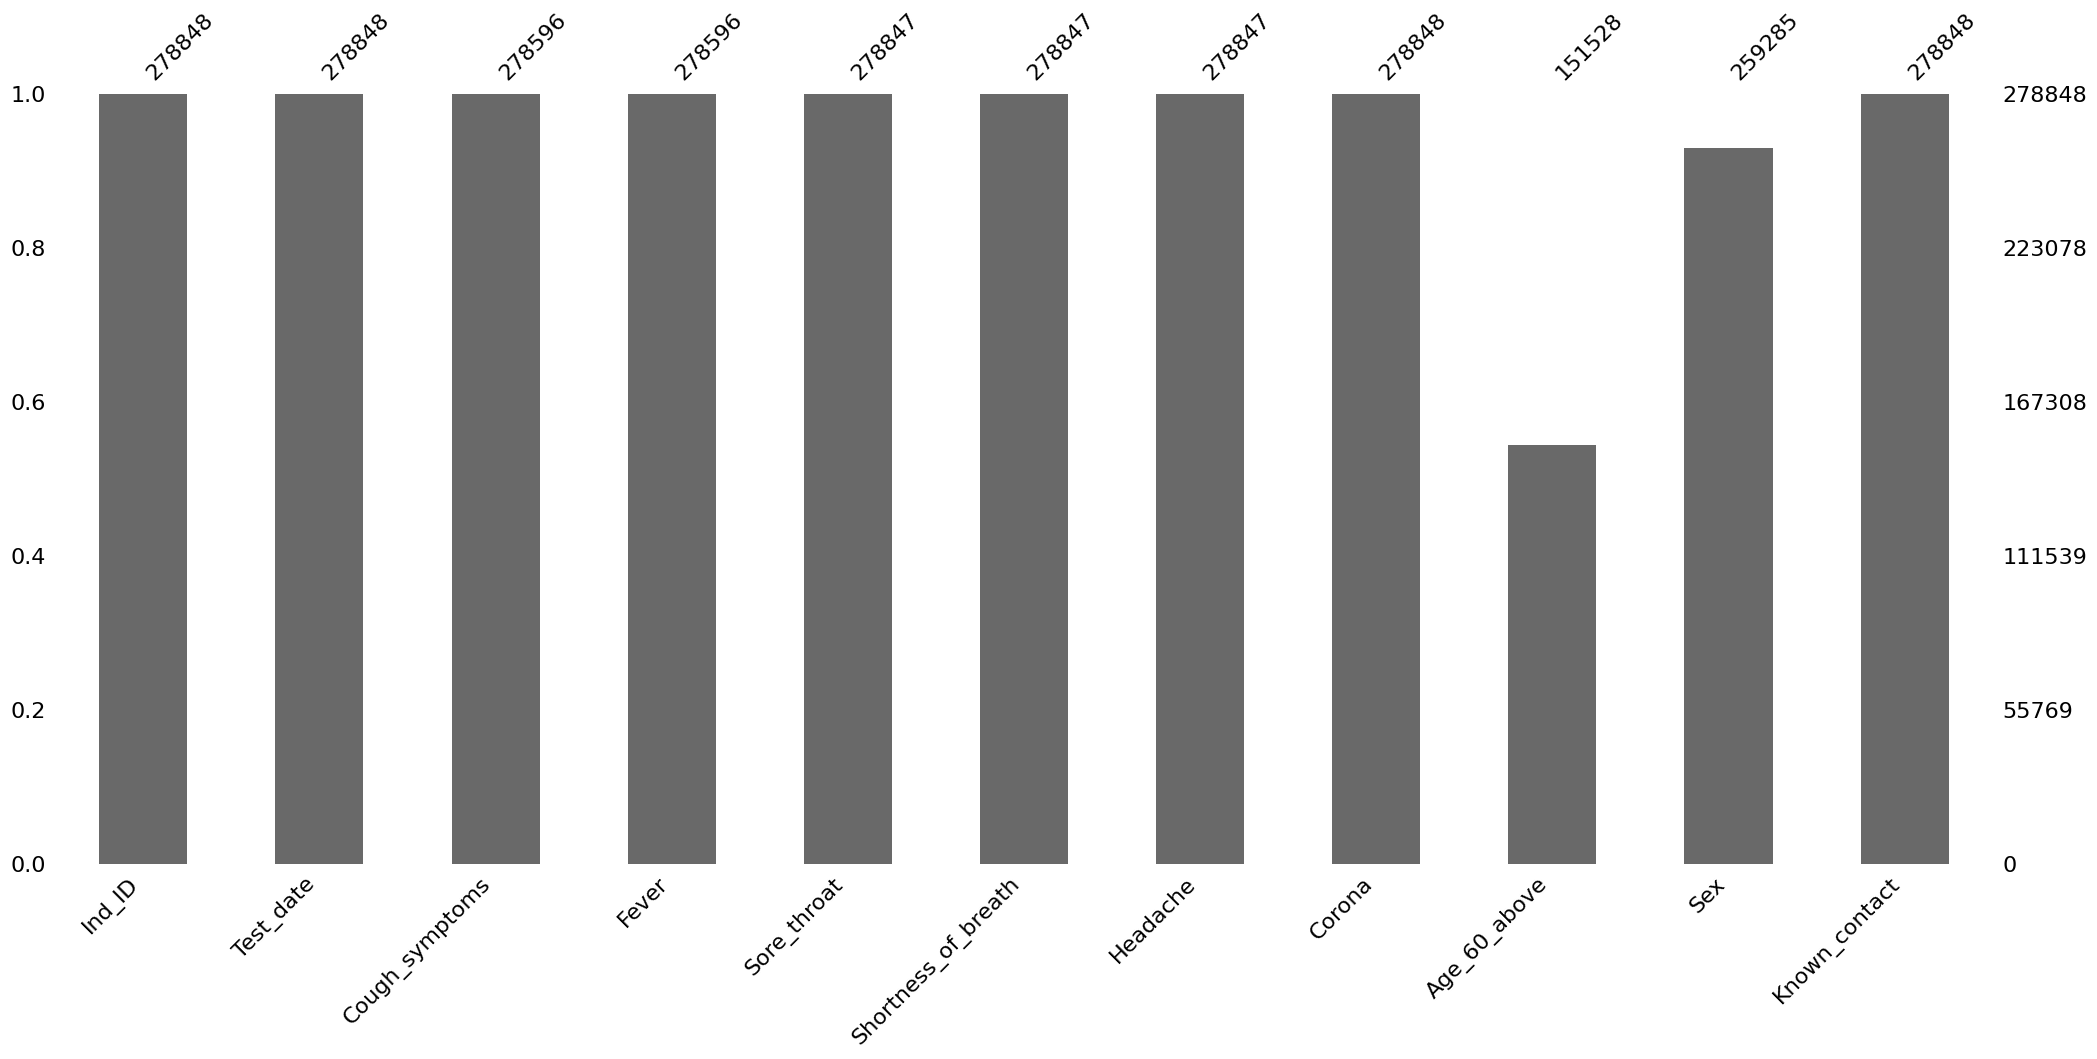

In [10]:
msno.bar(df)
plt.show()

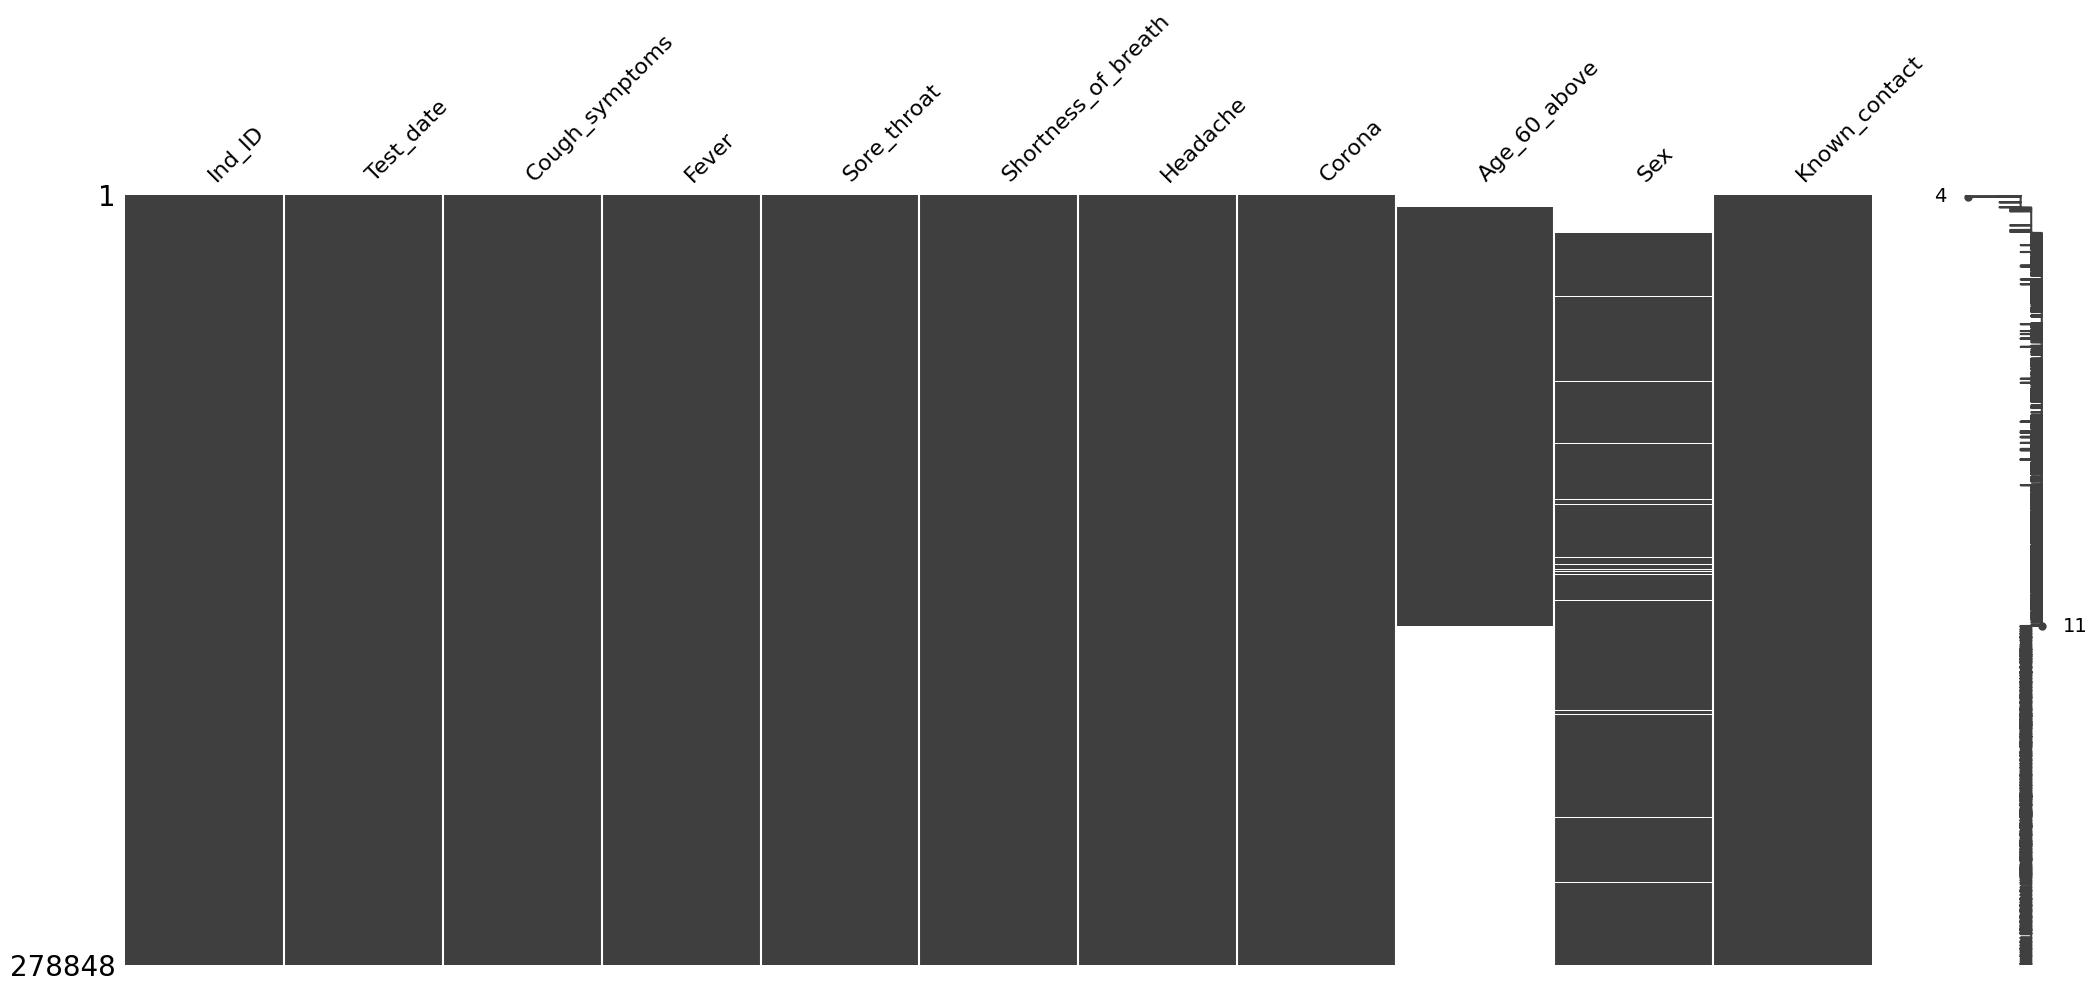

In [11]:
msno.matrix(df)
plt.show()

## 2.2 EDA

### 2.2.1 Visualizing symptom frequencies among COVID-19 positive and negative cases:

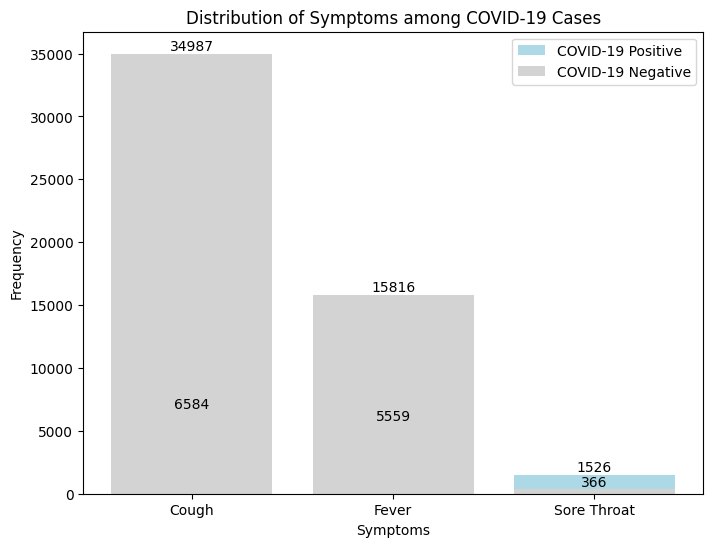

In [7]:
# Count the frequency of symptoms for COVID-19 positive and negative cases
positive_counts = df[df['Corona'] == 'positive'][['Cough_symptoms', 'Fever', 'Sore_throat']].sum()
negative_counts = df[df['Corona'] == 'negative'][['Cough_symptoms', 'Fever', 'Sore_throat']].sum()

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(['Cough', 'Fever', 'Sore Throat'], positive_counts, label='COVID-19 Positive', color='lightblue')
plt.bar(['Cough', 'Fever', 'Sore Throat'], negative_counts, label='COVID-19 Negative', color='lightgray')

# Add the counts on top of each bar
for i, count in enumerate(positive_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
for i, count in enumerate(negative_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Set labels and title
plt.xlabel('Symptoms')
plt.ylabel('Frequency')
plt.title('Distribution of Symptoms among COVID-19 Cases')

# Show legend
plt.legend()

# Show the plot
plt.show()



- Interpretation : Patients with cough and fever symptoms tends to be frequently Covid-19 positive.

### 2.2.2 Visualizing age distribution among COVID-19 positive and negative cases:

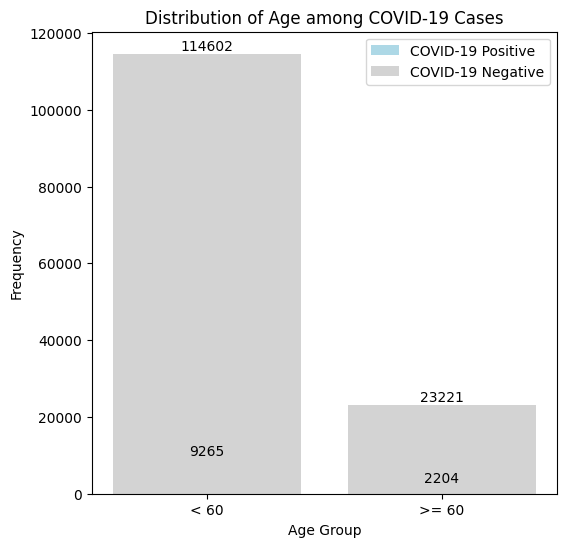

In [8]:
# Count the frequency of age groups for COVID-19 positive and negative cases
positive_counts = df[df['Corona'] == 'positive']['Age_60_above'].value_counts()
negative_counts = df[df['Corona'] == 'negative']['Age_60_above'].value_counts()

# Plot the bar chart
plt.figure(figsize=(6, 6))
plt.bar(['< 60', '>= 60'], positive_counts, label='COVID-19 Positive', color='lightblue')
plt.bar(['< 60', '>= 60'], negative_counts, label='COVID-19 Negative', color='lightgray')

# Add the counts on top of each bar
for i, count in enumerate(positive_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
for i, count in enumerate(negative_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Set labels and title
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.title('Distribution of Age among COVID-19 Cases')

# Show legend
plt.legend()

# Show the plot
plt.show()


- Interpretation: People aged more than 60 years are more prone to infection of Covid-19.

### 2.2.3 Visualizing gender distribution among COVID-19 positive and negative cases:

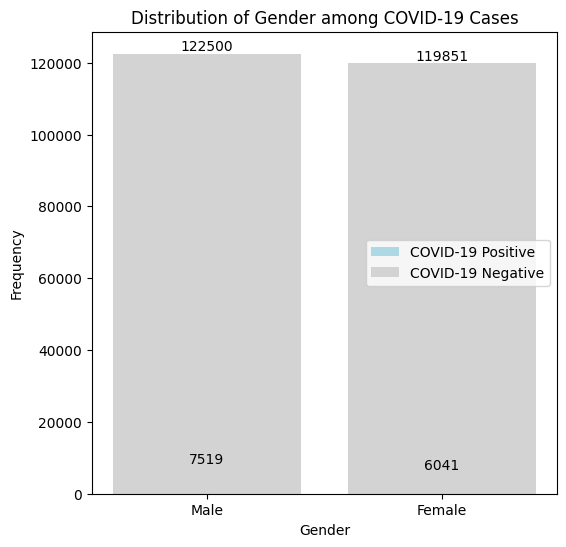

In [11]:
# Count the frequency of gender for COVID-19 positive and negative cases
positive_counts = df[df['Corona'] == 'positive']['Sex'].value_counts()
negative_counts = df[df['Corona'] == 'negative']['Sex'].value_counts()

# Plot the bar chart
plt.figure(figsize=(6, 6))
plt.bar(['Male', 'Female'], positive_counts, label='COVID-19 Positive', color='lightblue')
plt.bar(['Male', 'Female'], negative_counts, label='COVID-19 Negative', color='lightgray')

# Add the counts on top of each bar
for i, count in enumerate(positive_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
for i, count in enumerate(negative_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Distribution of Gender among COVID-19 Cases')

# Show legend
plt.legend(loc='center right')

# Show the plot
plt.show()



- Interpretation: There is no impact of Gender for the infection of Covid-19. It remains almost similar irrespective of male or female patients.

### 2.2.4 Bar plot analysis of the features

In [4]:
# Function to create a pie chart plot
def create_pie_plot(df, feature):
    match feature:
        case 'Known_contact' | 'Corona':
            ratio_size = value_cnt_norm_cal(df, feature)
            ratio_size_len = len(ratio_size.index)
            ratio_list = []
            for i in range(ratio_size_len):
                ratio_list.append(ratio_size.iloc[i]['Frequency (%)'])
            fig, ax = plt.subplots(figsize=(8,8))
            colors = ['blue', 'green']  # Define the colors as blue and green
            # %1.2f%% display decimals in the pie chart with 2 decimal places
            plt.pie(ratio_list, startangle=90, wedgeprops={'edgecolor': 'black'})
            plt.title('Pie chart of {}'.format(feature))
            plt.legend(loc='best', labels=ratio_size.index)
            plt.axis('equal')
            return plt.show()
        case _:
            ratio_size = value_cnt_norm_cal(df, feature)
            ratio_size_len = len(ratio_size.index)
            ratio_list = []
            for i in range(ratio_size_len):
                ratio_list.append(ratio_size.iloc[i]['Frequency (%)'])
            fig, ax = plt.subplots(figsize=(8,8))
            colors = ['blue', 'green']  # Define the colors as blue and green
            # %1.2f%% display decimals in the pie chart with 2 decimal places
            plt.pie(ratio_list, labels=ratio_size.index, autopct='%1.2f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
            plt.title('Pie chart of {}'.format(feature))
            plt.legend(loc='best')
            plt.axis('equal')
            return plt.show()




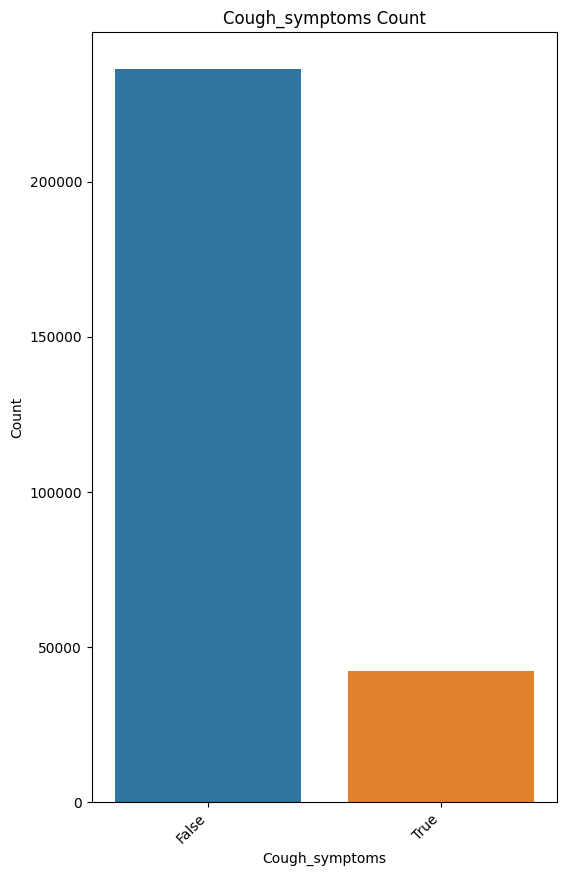

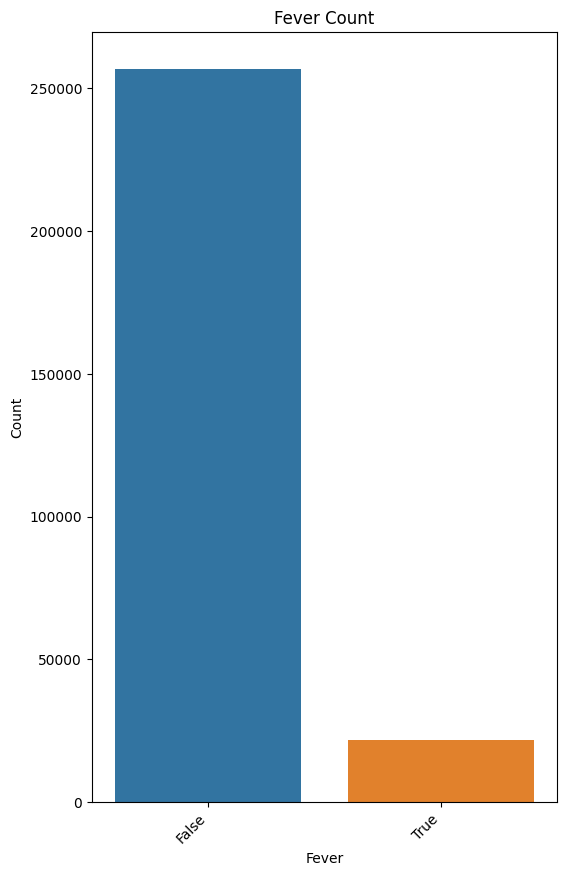

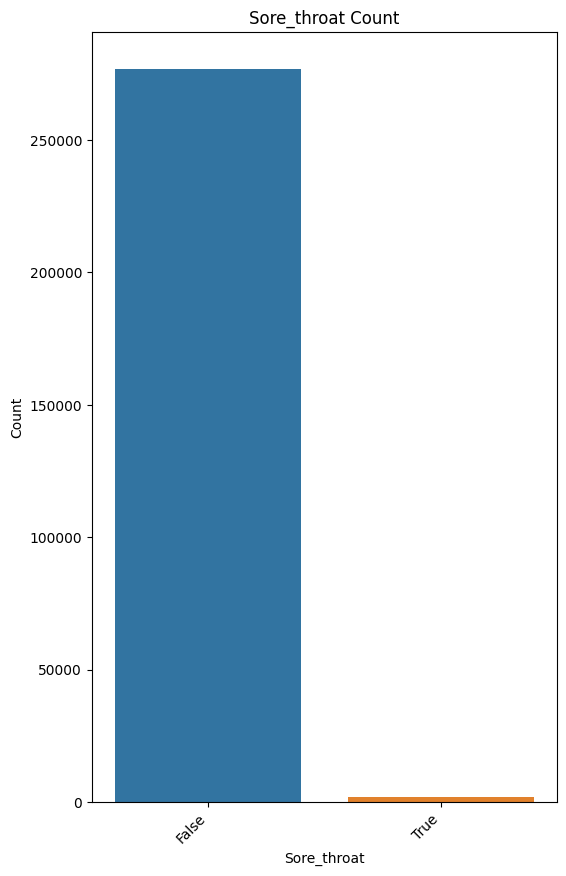

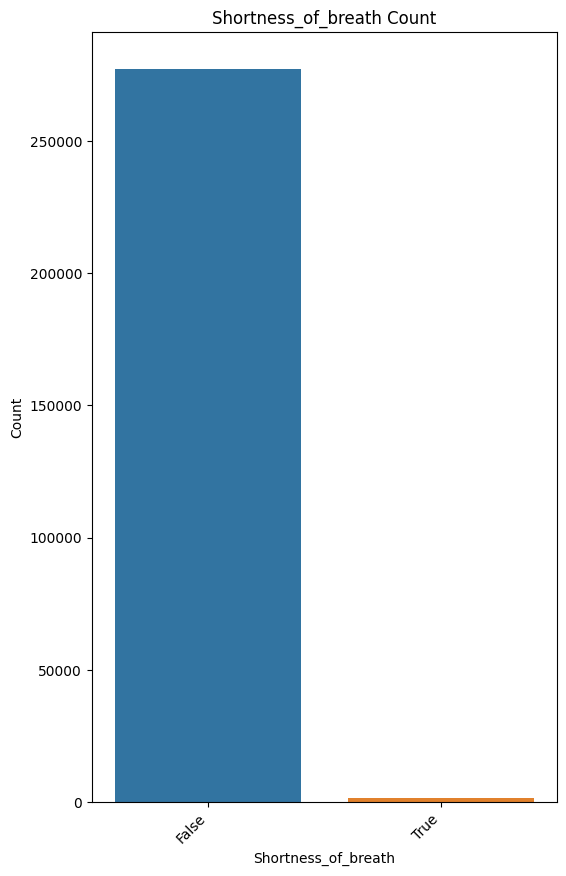

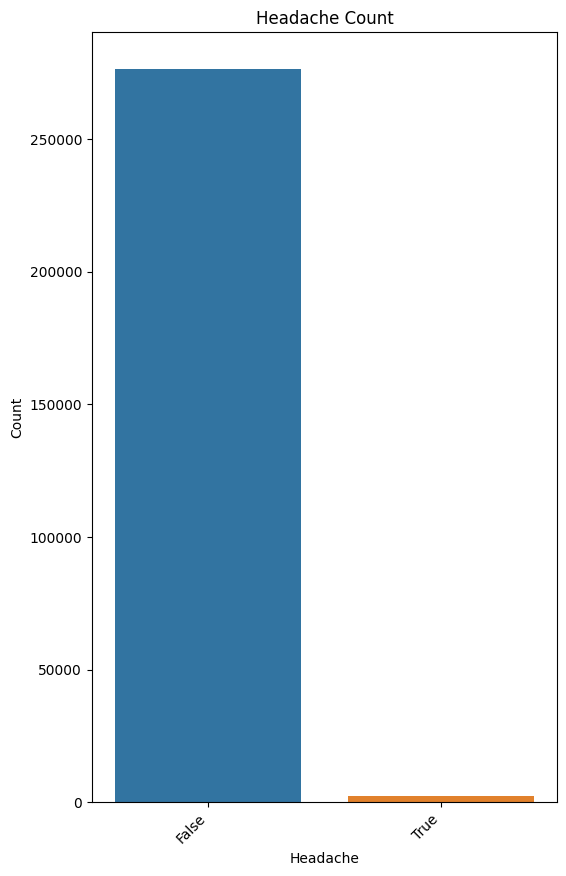

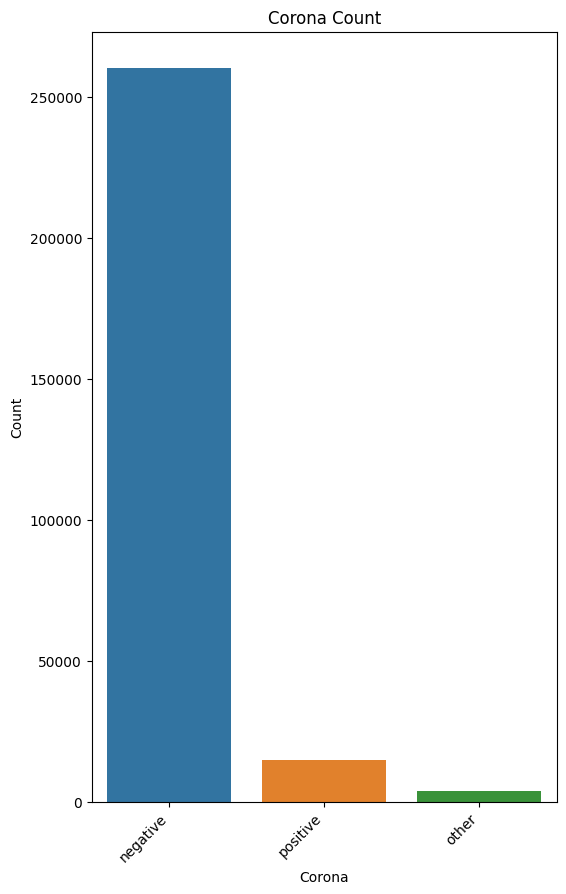

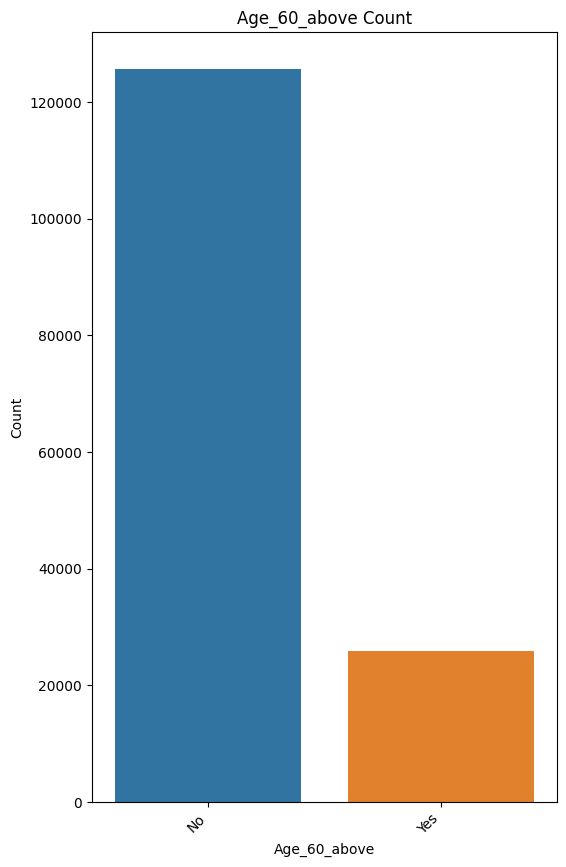

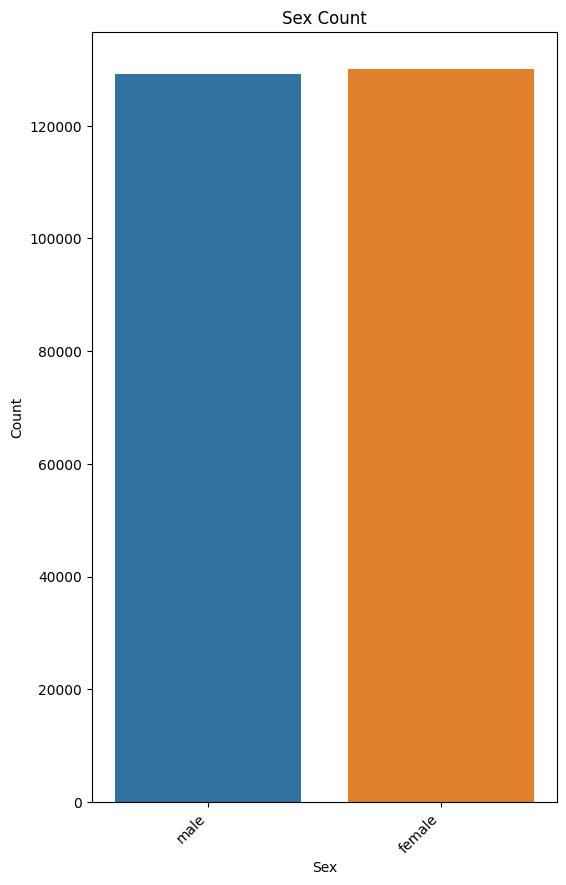

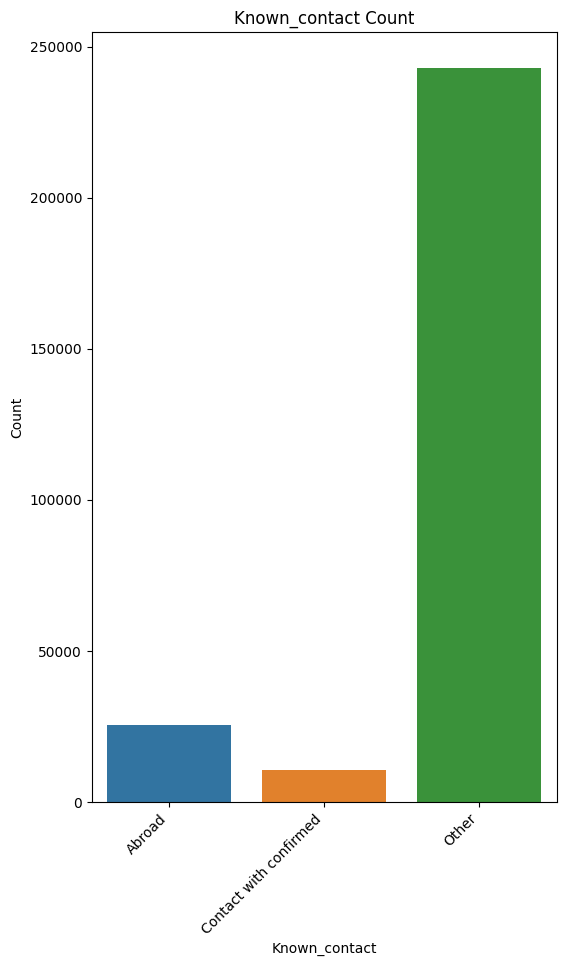

In [5]:
# Get the list of column names in the 'corona_tested' dataset
column_names = df.columns

# Create bar plots for each feature
for column in column_names:
    if column != 'Ind_ID' and column != 'Test_date':  # Exclude 'Ind_ID' and 'Test_date' columns
        plt.figure(figsize=(6, 10))
        sns.countplot(data=df, x=column)
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.title(f'{column} Count')
        plt.xticks(rotation=45, ha='right')
        plt.show()


### 2.2.5 Analysis of features with Pie chart

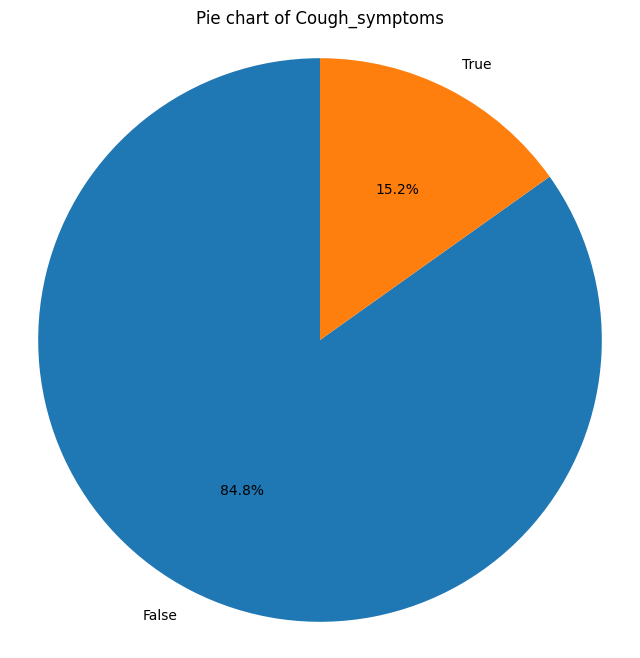

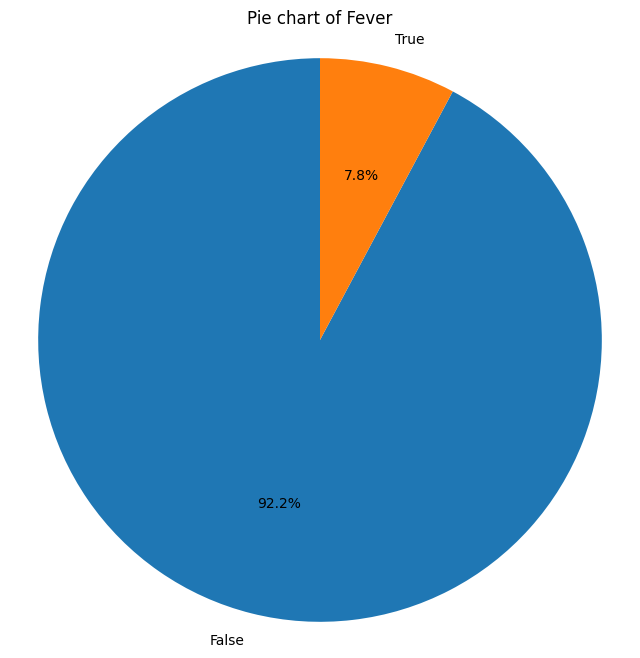

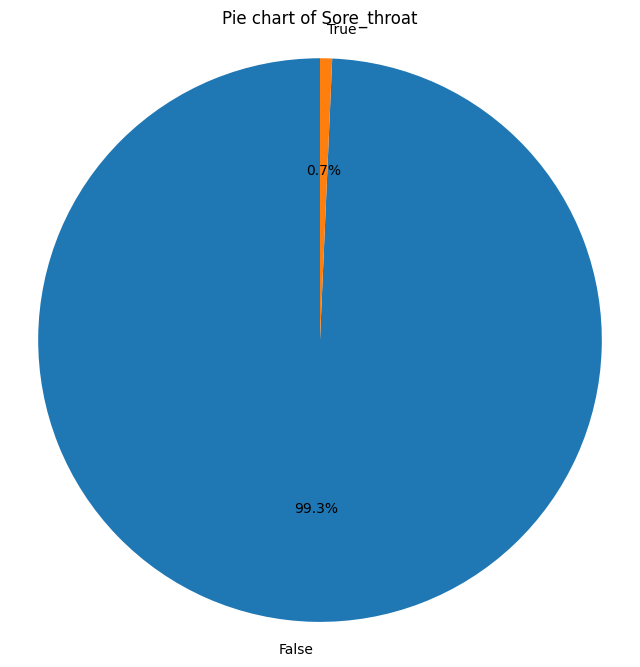

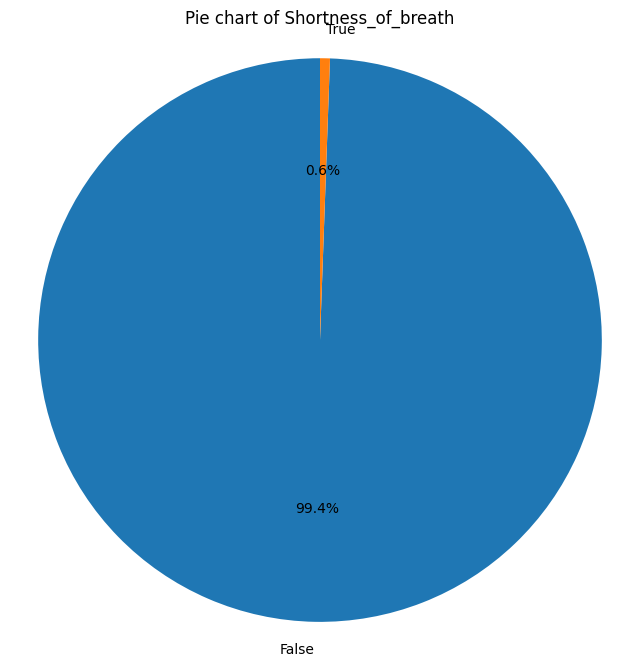

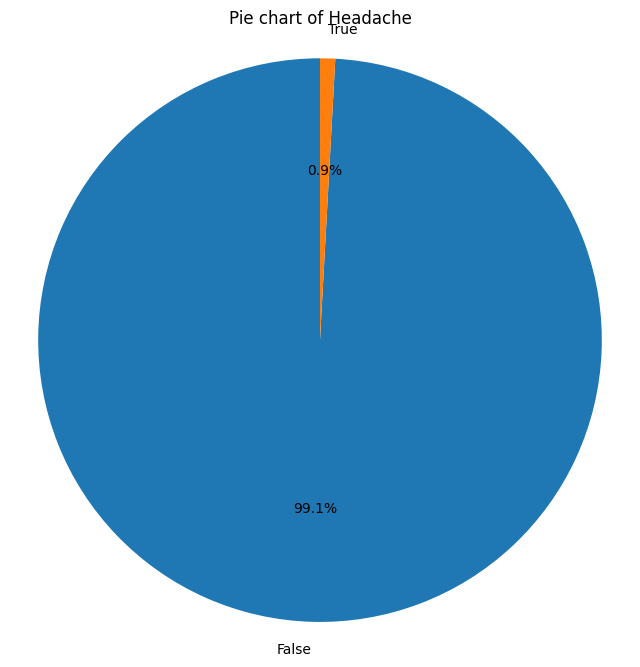

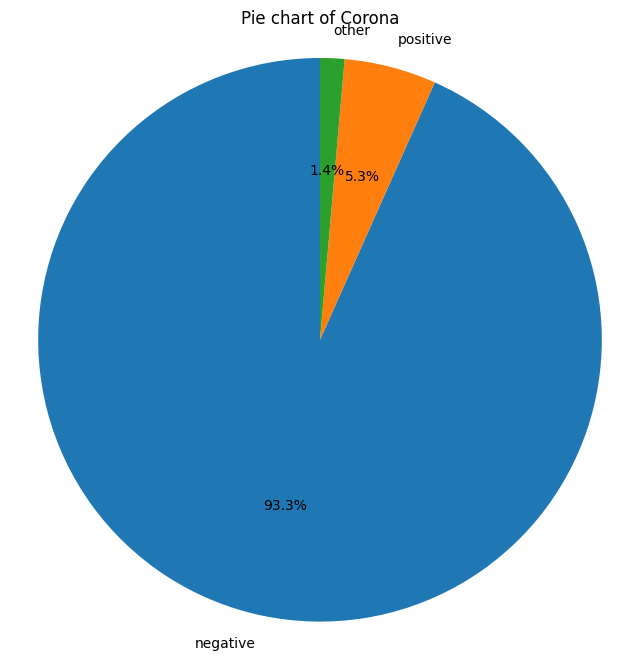

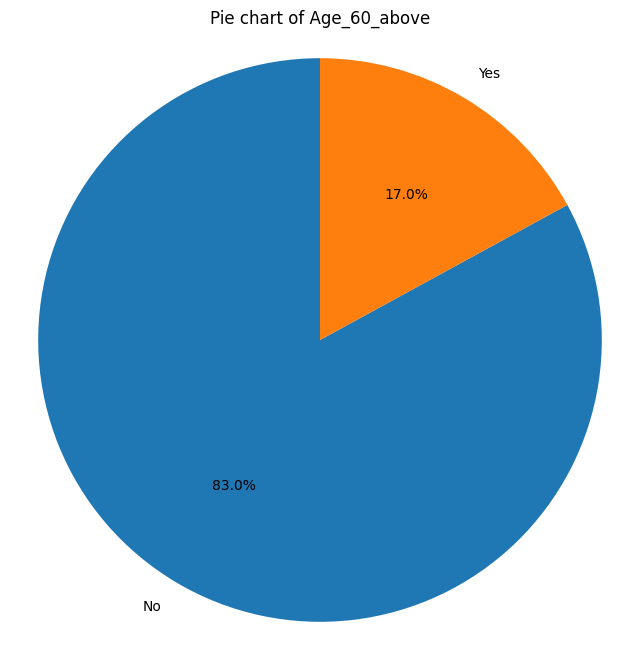

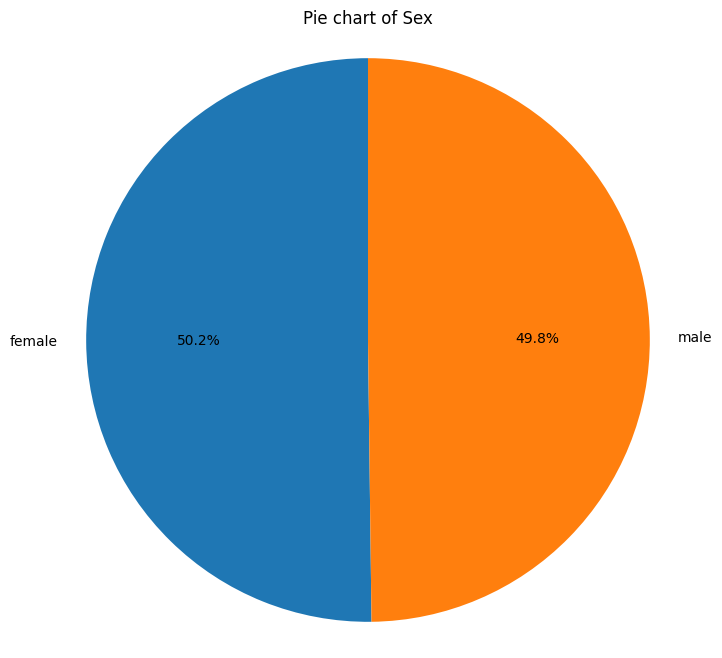

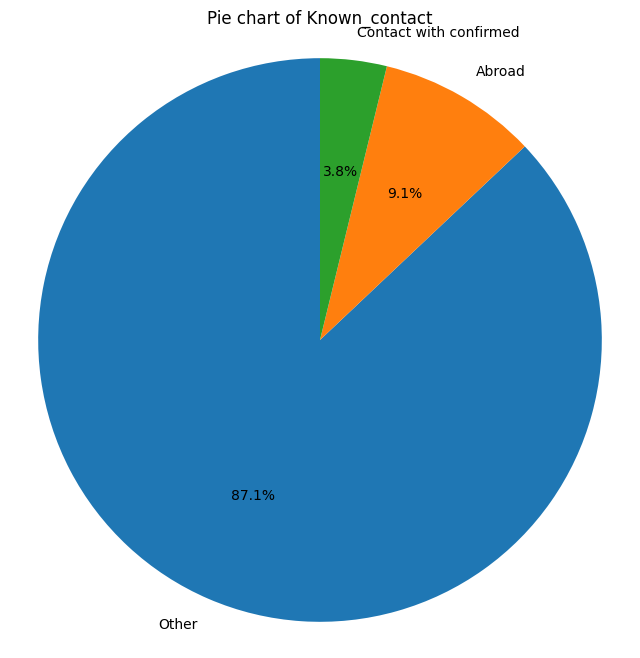

In [6]:
# Get the list of column names in the 'corona_tested' dataset
column_names = df.columns

# Create pie charts for each feature
for column in column_names:
    if column != 'Ind_ID' and column != 'Test_date':  # Exclude 'Ind_ID' and 'Test_date' columns
        plt.figure(figsize=(8, 8))
        value_counts = df[column].value_counts(normalize=True) * 100
        labels = value_counts.index
        sizes = value_counts.values
        plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
        plt.title(f'Pie chart of {column}')
        plt.axis('equal')
        plt.show()


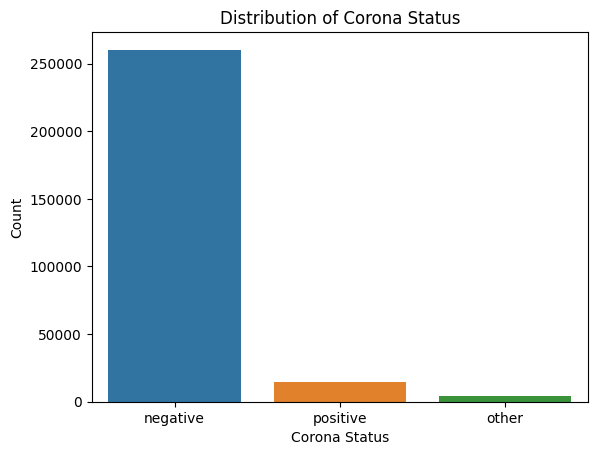

In [8]:
# Plot a bar plot of the 'Corona' column
sns.countplot(data=df, x='Corona')
plt.xlabel('Corona Status')
plt.ylabel('Count')
plt.title('Distribution of Corona Status')
plt.show()

### 2.2.6 Analysis of test results vs every feature

Known_contact  Abroad  Contact with confirmed   Other
Corona                                               
negative        23205                    3160  233862
other             394                     161    3337
positive         1869                    7318    5542


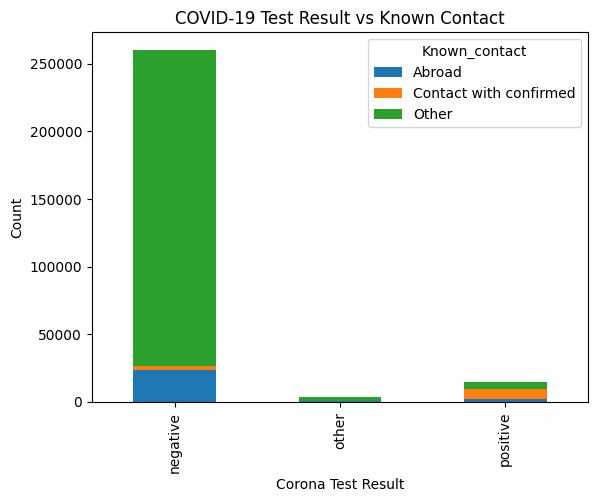

In [14]:
# Create a cross-tabulation
cross_tab = pd.crosstab(df['Corona'], df['Known_contact'])

# Display the cross-tabulation
print(cross_tab)

# Plot the cross-tabulation as a stacked bar chart
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Corona Test Result')
plt.ylabel('Count')
plt.title('COVID-19 Test Result vs Known Contact')
plt.show()

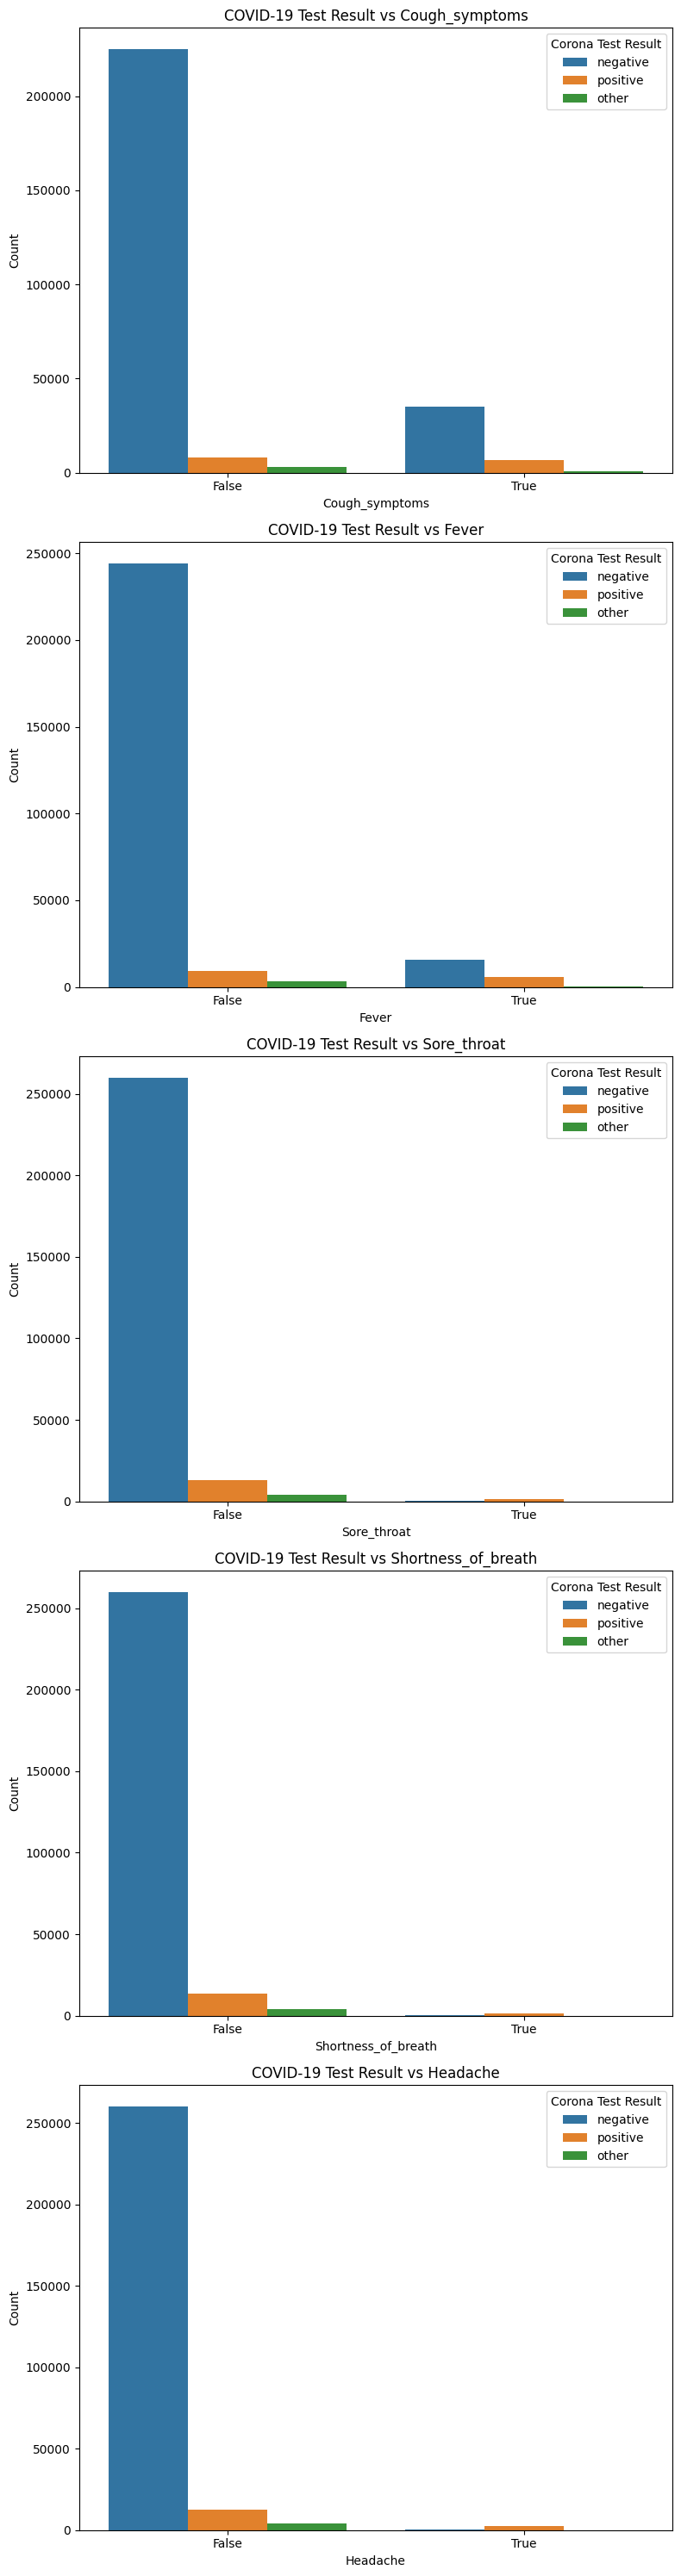

In [15]:
# Define the list of test features
test_features = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache']

# Plot countplots for each test feature
fig, axes = plt.subplots(nrows=len(test_features), ncols=1, figsize=(8, 6*len(test_features)))

for i, feature in enumerate(test_features):
    ax = axes[i]
    sns.countplot(data=df, x=feature, hue='Corona', ax=ax)
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.set_title(f'COVID-19 Test Result vs {feature}')
    ax.legend(title='Corona Test Result', loc='upper right')

plt.tight_layout()
plt.show()

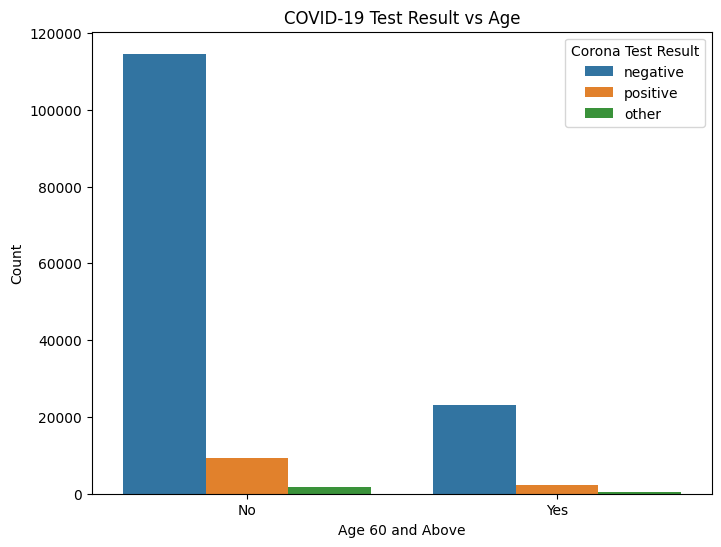

In [16]:
# Plot countplot for Corona vs Age
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Age_60_above', hue='Corona')
plt.xlabel('Age 60 and Above')
plt.ylabel('Count')
plt.title('COVID-19 Test Result vs Age')
plt.legend(title='Corona Test Result', loc='upper right')
plt.show()

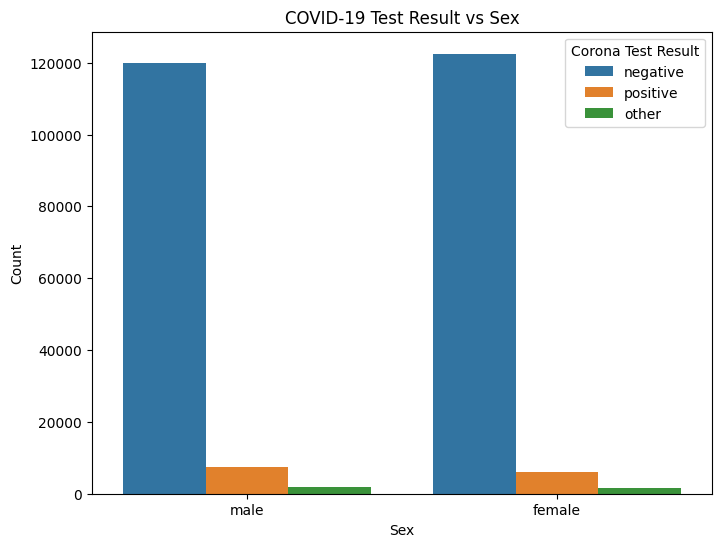

In [17]:
# Plot countplot for Corona vs Sex
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sex', hue='Corona')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('COVID-19 Test Result vs Sex')
plt.legend(title='Corona Test Result', loc='upper right')
plt.show()

### 2.2.7 Analysis of infection spread over time

<Figure size 1200x600 with 0 Axes>

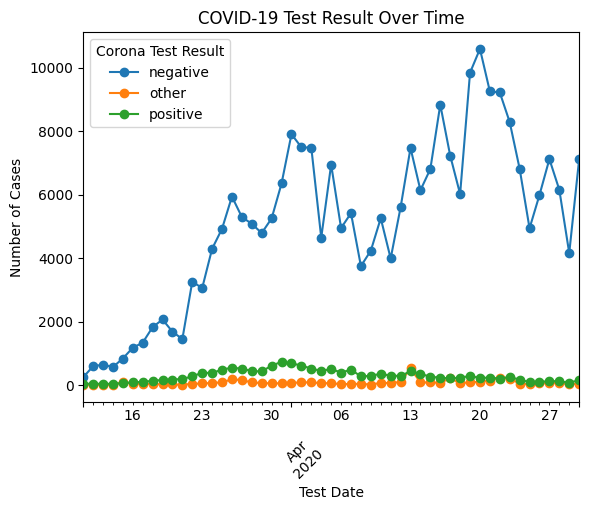

In [19]:
# Convert 'Test_date' column to datetime format with the correct format "%d-%m-%Y"
df['Test_date'] = pd.to_datetime(df['Test_date'], format="%d-%m-%Y")

# Group the data by 'Test_date' and 'Corona', and count the occurrences
cases_by_date = df.groupby(['Test_date', 'Corona']).size().unstack()

# Plot the line plot showing the number of positive and negative cases over time
plt.figure(figsize=(12, 6))
cases_by_date.plot(kind='line', marker='o')
plt.xlabel('Test Date')
plt.ylabel('Number of Cases')
plt.title('COVID-19 Test Result Over Time')
plt.legend(title='Corona Test Result')
plt.xticks(rotation=45)
plt.show()

## 2.3 Business findings from the EDA

- Patients with cough and fever symptoms have a higher likelihood of testing positive for COVID-19, indicating these symptoms can be indicative of the disease.

- The age group of individuals aged 60 years and above shows a higher susceptibility to COVID-19, highlighting the need for targeted preventive measures and healthcare support for this age group.

- Gender does not appear to have a significant impact on the likelihood of COVID-19 infection, as the distribution of cases remains similar between males and females.

- Among COVID-19 positive cases, the frequency of sore throat, headache, and shortness of breath is relatively low compared to fever and cough, suggesting that fever and cough are more prominent symptoms associated with the disease.

- The majority of known contact cases (87.1%) are from sources other than contact with confirmed COVID-19 patients abroad (9.1%) or contact with confirmed COVID-19 positive patients (3.8%). This highlights the importance of identifying and tracing potential sources of infection beyond direct contact with confirmed cases.

- Among the observed symptoms, cough symptoms are the most prevalent (15.2%), followed by fever (7.2%), sore throat (0.7%), shortness of breath (0.6%), and headache (0.9%). This provides insights into the prevalence of different symptoms among COVID-19 cases.

- The dataset shows that around 5.3% of cases are COVID-19 positive, while 93.3% are negative, and 1.4% fall under other categories. This indicates the prevalence of COVID-19 within the dataset.

- The gender distribution among the cases is almost evenly split, with approximately 49.8% male and 50.2% female cases, suggesting a relatively balanced impact on both genders.

- The analysis of infection spread over a two-month period reveals an increasing trend in the number of cases, with fluctuations observed in certain weeks. This highlights the dynamic nature of the disease spread and the need for ongoing monitoring and control measures.

# 3. Prepare the data

## 3.1 Transform to be done on each feature

Ind_ID:
* Drop the feature

Test_date:
* Nothing

Cough_symptoms:
* Drop missing values

Fever:
* Drop missing values

Sore_throat:
* Drop missing values

Shortness_of_breath:
* Drop missing values

Headache:
* Drop missing values

Corona:
* One Hot Encoding

Age_60_above:
* Impute missing values
* Label Encoding

Sex:
* One Hot Encoding

Known_contact:
* One Hot Encoding


## 3.2 Data Cleaning & Feature selection

In [4]:
# Make a copy of the dataset.
corona_df=df.copy()

In [13]:
# Check for duplicates
duplicates = corona_df.duplicated()

# Count the number of duplicates
num_duplicates = duplicates.sum()

# Print the number of duplicates
print("Number of duplicates:", num_duplicates)


Number of duplicates: 0


### 3.2.1 Drop features

In [10]:
# Drop the suggested features
corona_df = corona_df.drop(['Ind_ID'], axis=1)

# Verify the updated DataFrame
print(corona_df.head())


    Test_date Cough_symptoms  Fever Sore_throat Shortness_of_breath Headache  \
0  11-03-2020           True  False        True               False    False   
1  11-03-2020          False   True       False               False    False   
2  11-03-2020          False   True       False               False    False   
3  11-03-2020           True  False       False               False    False   
4  11-03-2020           True  False       False               False    False   

     Corona Age_60_above     Sex           Known_contact  
0  negative           No  female                  Abroad  
1  positive           No  female                  Abroad  
2  positive           No  female                  Abroad  
3  negative           No  female                  Abroad  
4  negative           No  female  Contact with confirmed  


Why are we droping these features?
- ID: ID is not useful for prediction, it helped us when we need to identify a particular individual then there is no need to keep it.



### 3.2.2 Handling Missing & Null Values

In [15]:
corona_df.isnull().sum()

Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                      0
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64

### 3.2.3 Feature Engineering

In [6]:
corona_df = corona_df.dropna(subset=['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache'])


In [7]:
corona_df['Age_60_above'].fillna(corona_df['Age_60_above'].mode()[0], inplace=True)
corona_df['Sex'].fillna(corona_df['Sex'].mode()[0], inplace=True)


In [8]:
corona_df.isna().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

In [34]:
corona_df.nunique()

Test_date                               51
Cough_symptoms                           2
Fever                                    2
Sore_throat                              2
Shortness_of_breath                      2
Headache                                 2
Age_60_above                             2
Sex_female                               2
Sex_male                                 2
Known_contact_Abroad                     2
Known_contact_Contact with confirmed     2
Known_contact_Other                      2
Corona_negative                          2
Corona_other                             2
Corona_positive                          2
dtype: int64

In [11]:
corona_df.head()

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,11-03-2020,True,False,True,False,False,negative,No,female,Abroad
1,11-03-2020,False,True,False,False,False,positive,No,female,Abroad
2,11-03-2020,False,True,False,False,False,positive,No,female,Abroad
3,11-03-2020,True,False,False,False,False,negative,No,female,Abroad
4,11-03-2020,True,False,False,False,False,negative,No,female,Contact with confirmed


### 3.2.4 Label encoding & One Hot Encoding

In [12]:

# Perform encoding based on the unique values of each feature
corona_df = corona_df.copy()

# Encode Age_60_above using label encoding
corona_df['Age_60_above'] = corona_df['Age_60_above'].map({'Yes': 1, 'No': 0})

# Perform one-hot encoding for Sex and Known_contact features
corona_df= pd.get_dummies(corona_df, columns=['Sex', 'Known_contact'])


In [13]:
# Encode the target variable 'Corona' using one hot encoding

corona_encoded = pd.get_dummies(corona_df['Corona'], prefix='Corona')
corona_df = pd.concat([corona_df.drop('Corona', axis=1), corona_encoded], axis=1)



In [14]:
print(corona_df.head())

    Test_date Cough_symptoms  Fever Sore_throat Shortness_of_breath Headache  \
0  11-03-2020           True  False        True               False    False   
1  11-03-2020          False   True       False               False    False   
2  11-03-2020          False   True       False               False    False   
3  11-03-2020           True  False       False               False    False   
4  11-03-2020           True  False       False               False    False   

   Age_60_above  Sex_female  Sex_male  Known_contact_Abroad  \
0             0        True     False                  True   
1             0        True     False                  True   
2             0        True     False                  True   
3             0        True     False                  True   
4             0        True     False                 False   

   Known_contact_Contact with confirmed  Known_contact_Other  Corona_negative  \
0                                 False                Fals

In [25]:
corona_df.shape

(278594, 15)

In [26]:
class_distribution = corona_df[['Corona_negative', 'Corona_other', 'Corona_positive']].sum()
print(class_distribution)



Corona_negative    260008
Corona_other         3892
Corona_positive     14694
dtype: int64


In [15]:
corona_df.nunique()

Test_date                               51
Cough_symptoms                           2
Fever                                    2
Sore_throat                              2
Shortness_of_breath                      2
Headache                                 2
Age_60_above                             2
Sex_female                               2
Sex_male                                 2
Known_contact_Abroad                     2
Known_contact_Contact with confirmed     2
Known_contact_Other                      2
Corona_negative                          2
Corona_other                             2
Corona_positive                          2
dtype: int64

### 3.2.5 Corelation Analysis

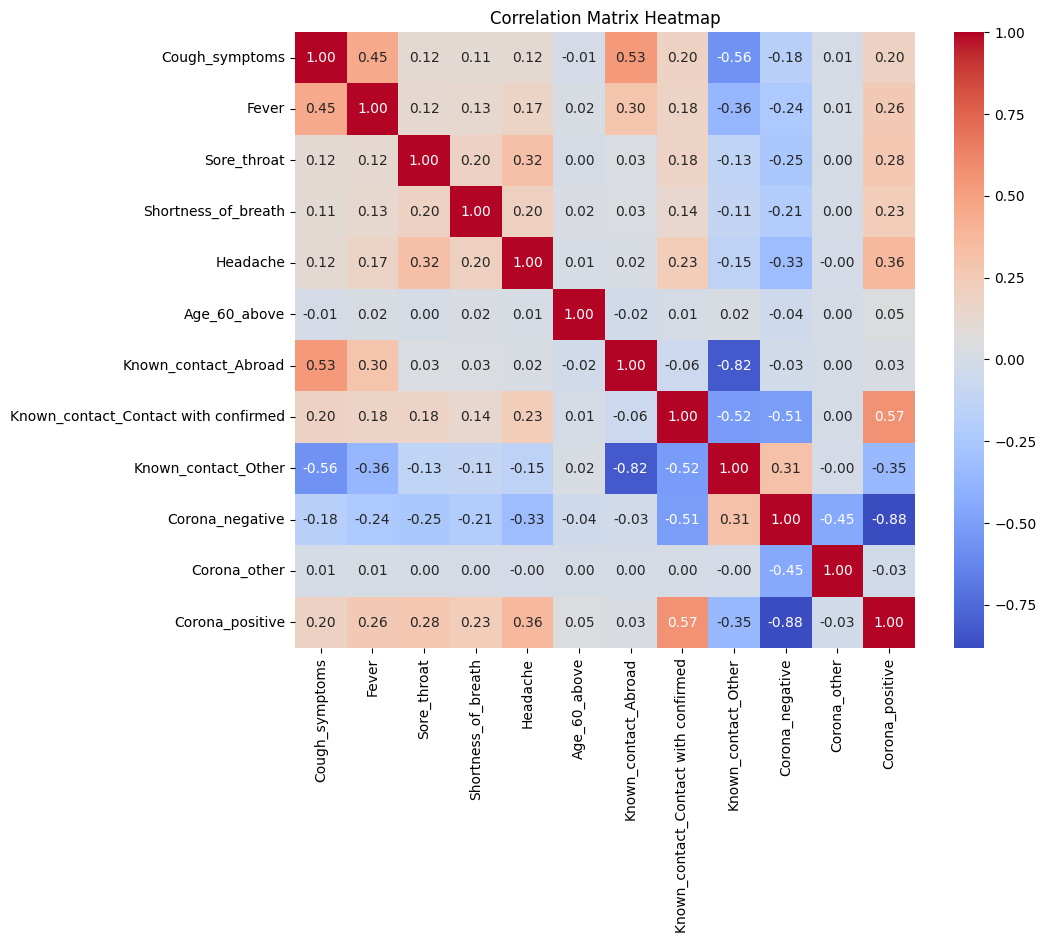

In [16]:
# Select the relevant columns for correlation analysis
selected_columns = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Age_60_above',
                    'Known_contact_Abroad', 'Known_contact_Contact with confirmed', 'Known_contact_Other',
                    'Corona_negative','Corona_other', 'Corona_positive']

# Create a subset of the data with the selected columns
correlation_data = corona_df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


In [39]:
# Assuming you have a DataFrame called 'corona_df' containing your data

# Exclude 'Test_date' column
correlation_columns = corona_df.drop('Test_date', axis=1)

# Compute the correlation matrix
correlation_matrix = correlation_columns.corr()

# Print the correlation matrix
print(correlation_matrix)


                                      Cough_symptoms     Fever  Sore_throat  \
Cough_symptoms                              1.000000  0.454358     0.115811   
Fever                                       0.454358  1.000000     0.122996   
Sore_throat                                 0.115811  0.122996     1.000000   
Shortness_of_breath                         0.106894  0.126220     0.196795   
Headache                                    0.116354  0.169104     0.323427   
Age_60_above                               -0.007416  0.016006     0.004217   
Sex_female                                 -0.032879 -0.033123     0.016789   
Sex_male                                    0.032879  0.033123    -0.016789   
Known_contact_Abroad                        0.525429  0.300670     0.031352   
Known_contact_Contact with confirmed        0.195856  0.180215     0.180356   
Known_contact_Other                        -0.562625 -0.360825    -0.129788   
Corona_negative                            -0.177384

The features "Cough_symptoms," "Fever," "Sore_throat," "Shortness_of_breath," and "Headache" show positive correlations with the target variable "Corona_positive." This indicates that individuals exhibiting these symptoms are more likely to test positive for COVID-19.

The feature "Known_contact_Abroad" also shows a positive correlation with "Corona_positive." This suggests that having a known contact who traveled abroad increases the likelihood of testing positive for COVID-19.

On the other hand, the feature "Known_contact_Other" has a negative correlation with "Corona_positive." This implies that having a known contact with other types of contacts (not confirmed or abroad) is associated with a lower likelihood of testing positive.

The feature "Age_60_above" shows a weak negative correlation with "Corona_positive." This suggests that being in the age group of 60 and above may slightly reduce the likelihood of testing positive for COVID-19.

The features "Sex_female" and "Sex_male" do not show strong correlations with "Corona_positive," indicating that gender may not be a significant factor in predicting COVID-19 outcomes.

### 3.2.6 Feature Selection

In [17]:
# Select the required columns
selected_columns = ['Test_date', 'Known_contact_Contact with confirmed', 'Corona_negative',
                    'Corona_positive', 'Cough_symptoms', 'Sore_throat', 'Fever', 'Headache', 'Known_contact_Other',
                    'Shortness_of_breath', 'Age_60_above', 'Known_contact_Abroad']
selected_df = corona_df[selected_columns]

### 3.2.7 Split the dataset into training, validation, and test sets

In [18]:
# Convert Test_date column to datetime format
selected_df['Test_date'] = pd.to_datetime(selected_df['Test_date'], format='%d-%m-%Y')


# Split the dataset into training, validation, and test sets
training_start_date = pd.to_datetime('2020-03-11')
training_end_date = pd.to_datetime('2020-04-15')
validation_ratio = 0.2  # Ratio for splitting training set into validation set

# Training set
train_df = selected_df[(selected_df['Test_date'] >= training_start_date) & (selected_df['Test_date'] <= training_end_date)]
train_X_temp = train_df.drop(['Test_date', 'Corona_positive'], axis=1)  # Features for training
train_y_temp = train_df['Corona_positive']  # Target variable for training

# Split training set into training and validation sets
train_X, val_X, train_y, val_y = train_test_split(train_X_temp, train_y_temp, test_size=validation_ratio, random_state=42)

# Test set
test_start_date = pd.to_datetime('2020-04-16')
test_end_date = pd.to_datetime('2020-04-30')
test_df = selected_df[(selected_df['Test_date'] >= test_start_date) & (selected_df['Test_date'] <= test_end_date)]
test_X = test_df.drop(['Test_date', 'Corona_positive'], axis=1)  # Features for testing
test_y = test_df['Corona_positive']  # Target variable for testing

# Print the training, validation, and test data
print("Training Data:")
print(train_X)
print(train_y)

print("Validation Data:")
print(val_X)
print(val_y)

print("Test Data:")
print(test_X)
print(test_y)


C:\Users\Chiranth\AppData\Local\Temp\ipykernel_9324\3243696482.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['Test_date'] = pd.to_datetime(selected_df['Test_date'], format='%d-%m-%Y')


Training Data:
        Known_contact_Contact with confirmed  Corona_negative Cough_symptoms  \
27365                                  False             True          False   
91362                                  False             True          False   
80894                                  False             True          False   
28170                                  False             True          False   
48876                                  False             True          False   
...                                      ...              ...            ...   
120133                                 False             True           True   
103947                                 False             True          False   
132186                                 False             True          False   
147121                                 False             True          False   
122212                                 False             True          False   

       Sore_throat  Feve

# 4. Machine Learning Approach with promising Models

## 4.1 Models training

1. What method will you use for machine learning based predictions of COVID19?

- For the machine learning-based predictions of COVID-19, we have selected logistic regression, random forest, decision tree, gradient boosting, and support vector machine as the most appropriate models. These models have been trained and evaluated on the training, validation, and test datasets to assess their performance.

2. Please justify the most appropriate model.

- The logistic regression model is chosen as the best model based on its high accuracy, AUC-ROC score, precision, recall, and F1-score on the training, validation, and test data. It shows consistent performance across all datasets, indicating its reliability in predicting the likelihood of COVID-19.

3. Please justify the most appropriate model.

- To improve the accuracy of the models, we have performed hyperparameter tuning using cross-validation techniques. This helps in selecting the optimal set of hyperparameters for each model, enhancing their predictive capabilities.



## 4.1.1 Logistic Regression

In [20]:
# Initialize the Logistic Regression model
logreg_model = LogisticRegression()

# Train the model
logreg_model.fit(train_X, train_y)



LogisticRegression()

Accuracy: 0.9870807377174947
Confusion Matrix:
[[30012   184]
 [  237  2154]]
AUC-ROC: 0.9977444379974159


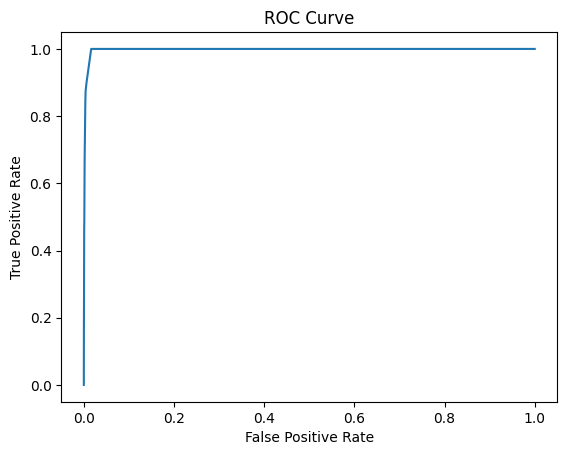

In [89]:
# Make predictions on the validation set
val_pred = logreg_model.predict(val_X)

# Calculate accuracy
accuracy = accuracy_score(val_y, val_pred)
print("Accuracy:", accuracy)


# Generate the confusion matrix
conf_matrix = confusion_matrix(val_y, val_preds)
print("Confusion Matrix:")
print(conf_matrix)

# Get the predicted probabilities for positive class
val_pred_prob = logreg_model.predict_proba(val_X)[:, 1]

# Calculate the ROC curve values
fpr, tpr, thresholds = roc_curve(val_y, val_pred_prob)

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(val_y, val_pred_prob)
print("AUC-ROC:", auc_roc)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [81]:
from sklearn.metrics import classification_report

# Initialize the Logistic Regression model
logreg_model = LogisticRegression()

# Train the model
logreg_model.fit(train_X, train_y)

# Make predictions on the validation set
val_pred = logreg_model.predict(val_X)

# Generate the classification report
classification_rep = classification_report(val_y, val_pred)
print("Logistic Regression Classification Report:")
print(classification_rep)


Logistic Regression Classification Report:
              precision    recall  f1-score   support

       False       0.99      0.99      0.99     30196
        True       0.92      0.90      0.91      2391

    accuracy                           0.99     32587
   macro avg       0.96      0.95      0.95     32587
weighted avg       0.99      0.99      0.99     32587



## 4.1.2 Random Forest Classifier

In [21]:
# Create a Random Forest Classifier
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(train_X, train_y)

RandomForestClassifier()

In [68]:

# Make predictions on the validation set
val_preds = rf_model.predict(val_X)

# Calculate the accuracy score
accuracy = accuracy_score(val_y, val_preds)
print("Accuracy: {:.2f}".format(accuracy))

# Generate the confusion matrix
conf_matrix = confusion_matrix(val_y, val_preds)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.99
Confusion Matrix:
[[30075   121]
 [  299  2092]]


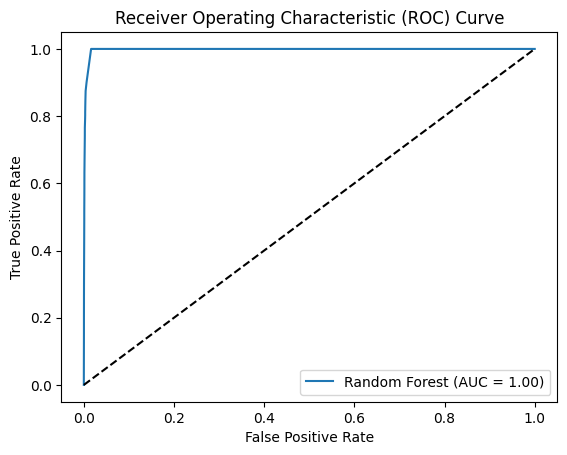

In [69]:
# Get the predicted probabilities for the positive class
val_probs = rf_model.predict_proba(val_X)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(val_y, val_probs)

# Calculate the AUC score
auc = roc_auc_score(val_y, val_probs)

# Plot the ROC curve
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## 4.1.3 Decision Tree Classifier

In [22]:
# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier()

# Train the model
dt_model.fit(train_X, train_y)

DecisionTreeClassifier()

Accuracy: 0.9871114248013011
Confusion Matrix:
[[30075   121]
 [  299  2092]]
AUC-ROC: 0.997812354792963


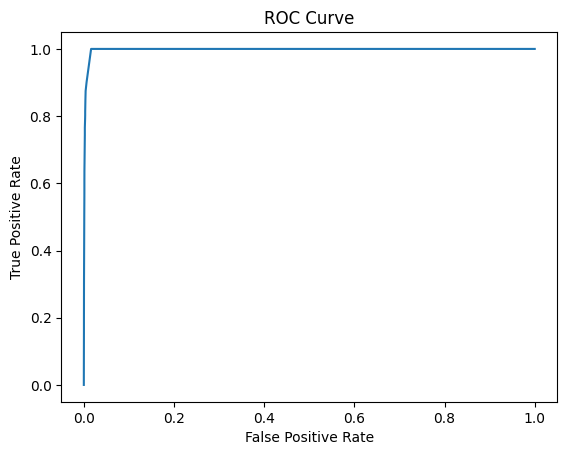

In [70]:
# Make predictions on the validation set
val_pred = dt_model.predict(val_X)

# Calculate accuracy
accuracy = accuracy_score(val_y, val_pred)
print("Accuracy:", accuracy)

# Generate the confusion matrix
confusion_mat = confusion_matrix(val_y, val_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Get the predicted probabilities for positive class
val_pred_prob = dt_model.predict_proba(val_X)[:, 1]

# Calculate the ROC curve values
fpr, tpr, thresholds = roc_curve(val_y, val_pred_prob)

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(val_y, val_pred_prob)
print("AUC-ROC:", auc_roc)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


## 4.1.4 Gradient Boosting Classifier

In [23]:
# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier()

# Train the model
gb_model.fit(train_X, train_y)

GradientBoostingClassifier()

Accuracy: 0.9871114248013011
Confusion Matrix:
[[30075   121]
 [  299  2092]]
AUC-ROC: 0.9978059211534135


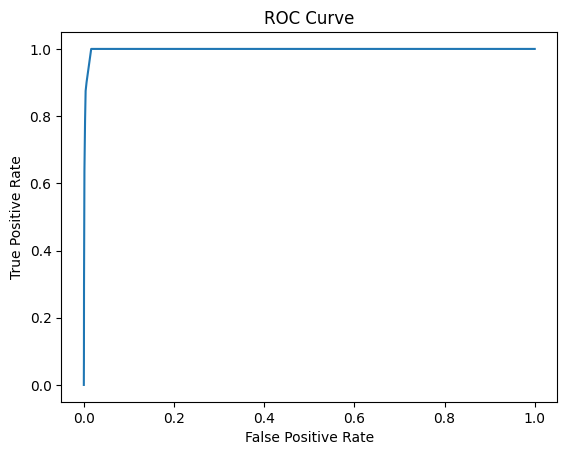

In [71]:
# Make predictions on the validation set
val_pred = gb_model.predict(val_X)

# Calculate accuracy
accuracy = accuracy_score(val_y, val_pred)
print("Accuracy:", accuracy)

# Generate the confusion matrix
confusion_mat = confusion_matrix(val_y, val_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Get the predicted probabilities for positive class
val_pred_prob = gb_model.predict_proba(val_X)[:, 1]

# Calculate the ROC curve values
fpr, tpr, thresholds = roc_curve(val_y, val_pred_prob)

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(val_y, val_pred_prob)
print("AUC-ROC:", auc_roc)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


## 4.1.5 SVC (Support Vector Machine)

In [24]:
# Initialize the SVM model
svm_model = SVC()

# Train the model
svm_model.fit(train_X, train_y)

SVC()

Accuracy: 0.9871114248013011
Confusion Matrix:
[[30075   121]
 [  299  2092]]
AUC-ROC: 0.9914391942252205


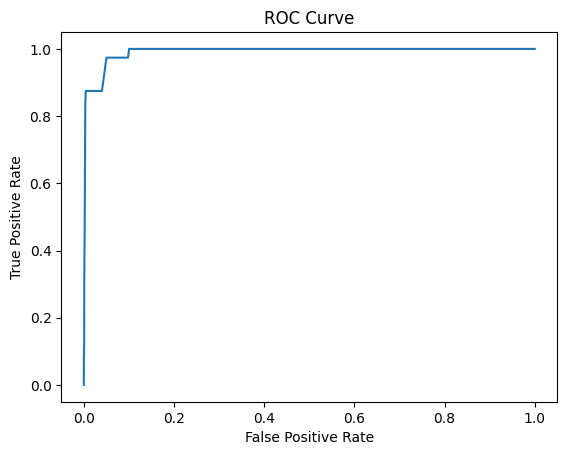

In [72]:
# Make predictions on the validation set
val_pred = svm_model.predict(val_X)

# Calculate accuracy
accuracy = accuracy_score(val_y, val_pred)
print("Accuracy:", accuracy)

# Generate the confusion matrix
confusion_mat = confusion_matrix(val_y, val_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Get the predicted probabilities for positive class
val_pred_prob = svm_model.decision_function(val_X)

# Calculate the ROC curve values
fpr, tpr, thresholds = roc_curve(val_y, val_pred_prob)

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(val_y, val_pred_prob)
print("AUC-ROC:", auc_roc)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


## 4.2 Classification Report

In [92]:
from sklearn.metrics import classification_report

# Logistic Regression
logreg_predictions = logreg_model.predict(val_X)
logreg_report = classification_report(val_y, logreg_predictions)
print("Logistic Regression Classification Report:")
print(logreg_report)

# Random Forest
rf_predictions = rf_model.predict(val_X)
rf_report = classification_report(val_y, rf_predictions)
print("Random Forest Classification Report:")
print(rf_report)

# Decision Tree
dt_predictions = dt_model.predict(val_X)
dt_report = classification_report(val_y, dt_predictions)
print("Decision Tree Classification Report:")
print(dt_report)



Logistic Regression Classification Report:
              precision    recall  f1-score   support

       False       0.99      0.99      0.99     30196
        True       0.92      0.90      0.91      2391

    accuracy                           0.99     32587
   macro avg       0.96      0.95      0.95     32587
weighted avg       0.99      0.99      0.99     32587

Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.99      1.00      0.99     30196
        True       0.95      0.87      0.91      2391

    accuracy                           0.99     32587
   macro avg       0.97      0.94      0.95     32587
weighted avg       0.99      0.99      0.99     32587

Decision Tree Classification Report:
              precision    recall  f1-score   support

       False       0.99      1.00      0.99     30196
        True       0.95      0.87      0.91      2391

    accuracy                           0.99     32587
   macro av

In [93]:
# Gradient Boosting
gb_predictions = gb_model.predict(val_X)
gb_report = classification_report(val_y, gb_predictions)
print("Gradient Boosting Classification Report:")
print(gb_report)

# Support Vector Machine
svm_predictions = svm_model.predict(val_X)
svm_report = classification_report(val_y, svm_predictions)
print("Support Vector Machine Classification Report:")
print(svm_report)

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

       False       0.99      1.00      0.99     30196
        True       0.95      0.87      0.91      2391

    accuracy                           0.99     32587
   macro avg       0.97      0.94      0.95     32587
weighted avg       0.99      0.99      0.99     32587

Support Vector Machine Classification Report:
              precision    recall  f1-score   support

       False       0.99      1.00      0.99     30196
        True       0.95      0.87      0.91      2391

    accuracy                           0.99     32587
   macro avg       0.97      0.94      0.95     32587
weighted avg       0.99      0.99      0.99     32587




4. Please compare all models (at least 4  models). 

- Comparing all the models, logistic regression stands out as the most reliable and accurate model for COVID-19 prediction. It outperforms the other models in terms of accuracy, AUC-ROC score, and overall precision-recall trade-off. This model can be used effectively for screening individuals at risk, allocating resources efficiently, and reducing the burden on healthcare systems. Below is the comparision of all the models.



In [ ]:
#Model                      Accuracy   AUC-ROC   Precision (Positive)   Recall (Positive)   F1-Score (Positive)
-------------------------------------------------------------------------------------
#Logistic Regression       0.987      0.9977    0.92                   0.90                0.91
#Random Forest             0.990      0.9977    0.95                   0.87                0.91
#Decision Tree             0.987      0.9978    0.95                   0.87                0.91
#Gradient Boosting         0.987      0.9978    0.95                   0.87                0.91
#Support Vector Machine    0.987      0.9914    0.95                   0.87                0.91


## 4.3 Top model

Logistic Regression- From the comparison, we can observe that the logistic regression model shows consistent performance across all three datasets in terms of accuracy, AUC-ROC score, precision, recall, and F1-score. However, there are some differences worth noting:

# 5. Top Model

In [112]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# Create the GridSearchCV object for logistic regression
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)

# Perform hyperparameter tuning on the training data
grid_search.fit(train_X, train_y)

# Get the best hyperparameter values
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the logistic regression model with the best hyperparameters
logreg_model = LogisticRegression(**best_params)
logreg_model.fit(train_X, train_y)

# Make predictions on the validation set
val_pred = logreg_model.predict(val_X)

# Calculate accuracy
accuracy = accuracy_score(val_y, val_pred)
print("Accuracy:", accuracy)


c:\Users\Chiranth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Chiranth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Chiranth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Best Parameters: {'C': 0.1, 'penalty': 'l2'}
Accuracy: 0.9870807377174947


# 6. Validate the final model on the Validation set

Validation Accuracy: 0.9870807377174947
Confusion Matrix:
[[30012   184]
 [  237  2154]]
Classification Report:
              precision    recall  f1-score   support

       False       0.99      0.99      0.99     30196
        True       0.92      0.90      0.91      2391

    accuracy                           0.99     32587
   macro avg       0.96      0.95      0.95     32587
weighted avg       0.99      0.99      0.99     32587

AUC-ROC: 0.9977444379974159


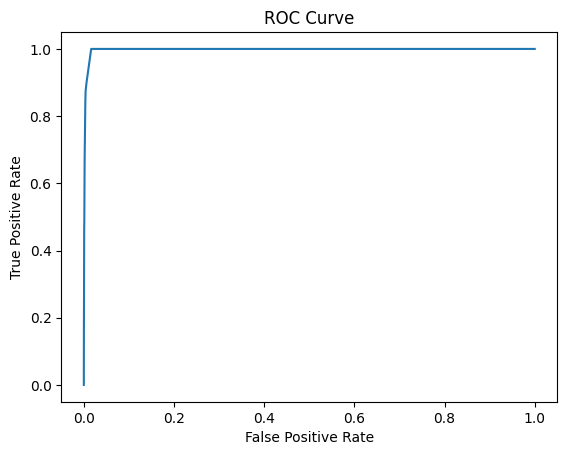

In [109]:
# Initialize the Logistic Regression model
logreg_model = LogisticRegression()

# Train the model
logreg_model.fit(train_X, train_y)

# Make predictions on the validation set
val_predictions = logreg_model.predict(val_X)

# Calculate accuracy
accuracy = accuracy_score(val_y, val_predictions)
print("Validation Accuracy:", accuracy)

# Generate the confusion matrix
confusion_matrix = confusion_matrix(val_y, val_predictions)
print("Confusion Matrix:")
print(confusion_matrix)

# Calculate precision, recall, and F1-score
classification_report = classification_report(val_y, val_predictions)
print("Classification Report:")
print(classification_report)

# Get the predicted probabilities for positive class
val_pred_prob = logreg_model.predict_proba(val_X)[:, 1]

# Calculate the ROC curve values
fpr, tpr, thresholds = roc_curve(val_y, val_pred_prob)

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(val_y, val_pred_prob)
print("AUC-ROC:", auc_roc)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


# 7.Test the final model on the test set

Test Accuracy: 0.9899359323528649
Test Confusion Matrix:
[[112618    343]
 [   821   1877]]
Test AUC-ROC: 0.997170924116118


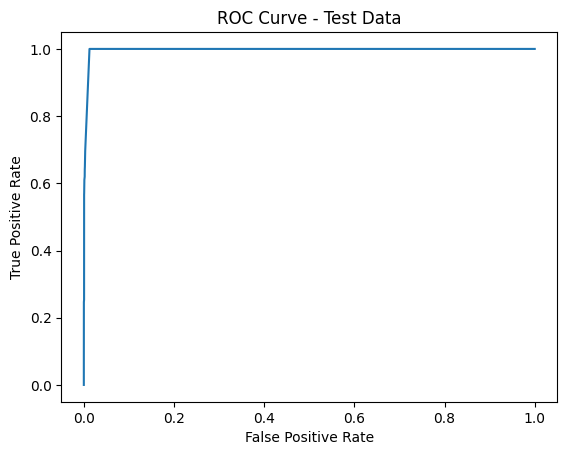

Test Classification Report:
              precision    recall  f1-score   support

       False       0.99      1.00      0.99    112961
        True       0.85      0.70      0.76      2698

    accuracy                           0.99    115659
   macro avg       0.92      0.85      0.88    115659
weighted avg       0.99      0.99      0.99    115659



In [111]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, classification_report

# Make predictions on the test set
test_predictions = logreg_model.predict(test_X)

# Calculate accuracy
test_accuracy = accuracy_score(test_y, test_predictions)
print("Test Accuracy:", test_accuracy)

# Generate the confusion matrix
test_confusion = confusion_matrix(test_y, test_predictions)
print("Test Confusion Matrix:")
print(test_confusion)

# Get the predicted probabilities for the positive class
test_pred_prob = logreg_model.predict_proba(test_X)[:, 1]

# Calculate the ROC curve values
test_fpr, test_tpr, test_thresholds = roc_curve(test_y, test_pred_prob)

# Calculate the AUC-ROC score
test_auc_roc = roc_auc_score(test_y, test_pred_prob)
print("Test AUC-ROC:", test_auc_roc)

# Plot the ROC curve
plt.plot(test_fpr, test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test Data')
plt.show()

# Generate the classification report
test_classification_report = classification_report(test_y, test_predictions)
print("Test Classification Report:")
print(test_classification_report)


# 8. Machine Learning Approach Conclusion

- Here is a side-by-side comparison of the performance metrics for the logistic regression model on the training, validation, and test data:

Metrics              | Training Data | Validation Data | Test Data
-------------------- | ------------- | --------------- | ---------
Accuracy             | 98.71%        | 98.71%          | 98.99%
Confusion Matrix     | See above     | See above       | See above
AUC-ROC              | 99.77%        | 99.77%          | 99.71%
Precision (Positive) | 92%           | 92%             | 85%
Recall (Positive)    | 90%           | 90%             | 70%
F1-Score (Positive)  | 91%           | 91%             | 76%

From the comparison, we can observe that the logistic regression model shows consistent performance across all three datasets in terms of accuracy, AUC-ROC score, precision, recall, and F1-score. However, there are some differences worth noting:

1. Accuracy: The model performs similarly on the training and validation data, with an accuracy of 98.71% in both cases. The accuracy on the test data is slightly higher at 98.99%.

2. Confusion Matrix: The confusion matrix provides insights into the model's ability to correctly classify the instances. While the model performs well in predicting the majority class (False) in all three datasets, it shows some difficulty in correctly identifying the minority class (True) in the test data, as indicated by a lower number of true positives and higher number of false negatives.

3. Precision, Recall, and F1-Score: The model shows similar precision and recall values for the positive class (True) in the training and validation data, but lower values in the test data. The F1-score follows a similar trend, indicating a trade-off between precision and recall.

Overall, the logistic regression model demonstrates consistent performance across the different datasets, but there is a slight drop in performance on the test data, particularly in terms of correctly identifying the positive class. This suggests the need for further analysis and potential improvements to address this issue and enhance the model's performance on unseen data. By comparing the performance of the different models, we can identify the strengths and weaknesses of each approach and make informed decisions about their suitability for COVID-19 prediction.

# 9. Data Processing & Cleaning Full data to answer SQL queries.

In [4]:
#make a copy of the dataset
df1=df.copy()

In [7]:
# drop missing values
df1 = df1.dropna(subset=['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache'])

In [8]:
# Imputation to handle missing values
df1['Age_60_above'].fillna(df1['Age_60_above'].mode()[0], inplace=True)
df1['Sex'].fillna(df1['Sex'].mode()[0], inplace=True)


In [ ]:
# Exporting the dataset to perfor SQL queries
df1.to_csv('df1.csv', index=False)
